In [5]:
from ctext import *
%pylab inline
%matplotlib
import matplotlib as mpl
import platform

if platform.system() == 'Darwin':   # I.e. if we're running on Mac OS X
    mpl.rcParams['font.family'] = 'Arial Unicode MS'
else:
    mpl.rcParams['font.family'] = "SimHei"
mpl.rcParams['font.size'] = 14

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

setapikey("596b8cdac07fccbdf11559bdc41ecf6b")

Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: Qt5Agg


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition as sklearnPCA

# This line tells the matplotlib library to display its output in our Jupyter notebook
%matplotlib inline 

import re

def makevector(string, termlist, normalize = False):
    vector = []
    for term in termlist:
        termcount = len(re.findall(term, string))
        if normalize:
            vector.append(termcount/len(string))
        else:
            vector.append(termcount)
    return vector

In [7]:
texts = ["ctp:wb894040", "ctp:wb900066", "ctp:wb70888", "ctp:wb842383","ctp:wb728938","ctp:wb763355","ctp:wb885546","ctp:wb954825","ctp:hongloumeng","ctp:wb773438"]                

mycolors = ["blue", "red", "green", "orange", "cyan", "black", "yellow","pink","brown","gray", "brown"]
passages = []


def gettextflat(urn):
    text = gettext(urn)
    if 'fulltext' in text:
        asstring = ""
        for para in range(0, len(text['fulltext'])):
            asstring = asstring + text['fulltext'][para] + "\n\n"
        return [asstring]
    if 'subsections' in text:
        chapterlist = []
        for subsection in text['subsections']:
            chapterlist = chapterlist + gettextflat(subsection)
        return chapterlist
    return []

for text in texts:
    passages.append(gettextflat(text)) 

In [8]:
import os

inputfolder = "开篇.tokenized"
inputfiles = os.listdir(inputfolder)


documents = []     # Store the documents in a list
documentnames = [] # Also store the filenames in a list 
for file in inputfiles:
    infile = open(inputfolder + "/" + file, "r", encoding="utf-8")
    documents.append(infile.read().split())
    documentnames.append(file)

In [6]:
import math

df = {} # One frequency value for each term appearing in any document

for doc in range(0, len(documents)):
    for term in documents[doc]:
        if term not in df:
            df[term] = 0
            for docnum in range(0, len(documents)):
                if term in documents[docnum]:
                    df[term] = df[term] + 1

In [7]:
df_sorted = sorted(df, key=df.get, reverse=True) 
print (df_sorted[0:500])


['是', '又', '不', '有', '？', '也', '，', '一', '。', '我', '可', '为', '中', '了', '要', '在', '人', '得', '两', '说', '之', '知', '他', '若', '未', '见', '道', '这', '去', '！', '：', '且', '将', '此', '的', '家', '才', '、', '著', '」', '看', '上', '敢', '与', '下', '来', '已', '无', '如', '正', '便', '何', '个', '都', '就', '「', '听', '还', '能', '如何', '再', '好', '甚', '到', '几', '把', '想', '三', '二', '那', '却', '你', '从', '并', '虽', '日', '事', '自', '因', '出', '对', '先', '但', '既', '处', '笑', '同', '前', '待', '尽', '多', '时', '更', '过', '小', '亦', '今日', '请', '而', '谁', '所', '以', '四', '做', '等', '如此', '真', '向', '十', '生', '岂', '酒', '闻', '只', '曾', '则', '年', '方', '心', '各', '于', '大', '其', '欲', '倒', '没', '使', '话', '送', '；', '早', '似', '说道', '花', '起来', '后', '万', '至', '肯', '里', '即', '非', '字', '些', '天', '成', '被', '难', '俱', '岁', '句', '当', '问', '罢', '五', '和', '下回', '名', '如今', '月', '《', '行', '原来', '言', '回', '》', '手', '分', '喜', '分解', '本', '原', '起身', '坐', '』', '今', '叫', '皆', '半', '每', '遂', '开', '书', '声', '乃', '怎', '写', '不过', '面', '故', '头', '子', '相', '情', '『', '身', '位', '件'

In [10]:
terms = ['有', '也', '又', '一', '不', '是', '。', '我', '中', '了', '可', '为', '人', '两', '知', '要', '之', '在', '得', '说', '的', '他', '若', '道', '见', '且', '将', '未', '此', '这', '去', '家', '来', '上', '才', '下', '看', '著', '敢', '与', '已', '如', '能', '个', '如何', '听', '都', '便', '还', '无', '正', '就', '何', '好', '到', '把', '再', '那', '几', '甚', '却', '三', '二', '想', '虽', '出', '日', '并', '从', '你', '事', '自', '因', '既', '尽', '多', '同', '处', '先', '前', '待', '时', '但', '对', '所', '谁', '四', '小', '请', '而', '更', '过', '亦', '今日', '以', '真', '等', '向', '做', '如此', '只', '方', '各', '曾', '年', '心', '闻', '十', '则', '生', '岂', '使', '欲', '其', '倒', '送', '话', '大', '似', '于', '说道', '没', '早', '些', '里', '天', '肯', '起来', '被', '成', '即', '至', '字', '难', '后', '万', '非', '罢', '岁', '下回', '俱', '问', '名', '句', '当', '五', '和', '行', '言', '回', '原来', '月', '如今', '叫', '每', '原', '起身', '皆', '半', '坐', '手', '分解', '今', '分', '本', '开', '声', '遂', '子', '故', '面', '头', '书', '相', '身', '不过', '乃', '写', '怎', '怕', '件', '内', '儿', '发', '就是', '知道', '长', '必', '莫', '接', '望', '会', '别', '明日', '地', '高', '间', '一般', '这个', '意', '作', '求', '带', '觉', '十分', '拜', '千', '快', '尚', '不知', '起', '走', '矣', '令', '入', '出来', '我们', '虽然', '段', '者', '竟', '人家', '全', '及', '许多', '少', '住', '恐', '往', '教', '首', '受', '吃', '边', '看见', '话说', '取', '遇', '最', '心中', '题', '天下', '口', '大家', '方才', '定', '应', '随', '常', '直', '场', '寻', '怎么', '须', '放', '连', '自然', '不觉', '忙', '甚么', '这些', '晓得', '太', '用', '所以', '便是', '点', '没有','众', '深', '那里', '实', '问道', '这样', '此时', '将来', '还有', '收拾', '遍', '只怕', '转', '留', '一时', '回来', '相见', '依', '第一', '只是', '吾', '家中', '有些', '后来', '百', '略', '念', '正是', '或', '论', '说话', '次日', '遭', '罢了', '外', '系', '自己', '真是', '极', '君', '愿', '走到', '老爷', '比', '绝', '打', '为人', '还是', '只得', '在此', '算', '另', '交', '为何', '不得', '难道', '番', '多少', '过来', '趁', '世', '众人', '耳', '果然', '白', '合', '数', '谢', '穿', '这里', '不曾', '递', '父亲', '辞', '完', '终', '且说', '一面', '听了', '任', '离', '该', '安', '坐下', '偏', '若是', '共', '拿', '条', '信', '观', '听见', '气', '固', '仍', '晚', '明白', '飞', '进', '正在', '由', '报', '犹', '空', '不如', '跟', '次', '蒙', '称', '假', '旁', '兼', '反', '替', '那个', '不妨', '让', '因此', '彼此', '种', '按', '破', '叙', '吩咐', '出去', '守', '收', '凭', '身上', '勉强', '传', '打点', '初', '断', '回家', '般', '近', '第二', '这般', '当时', '东西', '迎', '惊', '挂', '到了',]

df_joined = pd.DataFrame([], columns=terms)
df_joined["text"] = None

vectors = []
texttitle = []
for textnum in range(0,len(texts)):
    textinfo = gettextinfo(texts[textnum])
    desc = textinfo['title']
    if 'author' in textinfo:
        desc = desc + "（" + textinfo['author'] + "）"
    texttitle.append(desc)
    myvectors = []
    for p in passages[textnum]:
        myvectors.append(makevector(p, terms, True))
    vectors.append(myvectors)
    df_thisbook = pd.DataFrame(myvectors, columns=terms)
    df_thisbook['text'] = texts[textnum]
    df_joined = pd.concat([df_joined, df_thisbook])

display(df_joined)

df_joined.to_excel('style difference2.xlsx')

,有,也,又,一,不,是,。,我,中,了,...,近,第二,这般,当时,东西,迎,惊,挂,到了,text
0,0.004598,0.002299,0.002299,0.004598,0.011494,0.004598,0.041379,0.000000,0.000000,0.002299,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,ctp:wb894040
1,0.007790,0.003541,0.002125,0.008499,0.008499,0.004958,0.042493,0.005666,0.003541,0.002125,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,ctp:wb894040
2,0.003047,0.006432,0.000339,0.010156,0.006432,0.003724,0.045024,0.010156,0.003047,0.005078,...,0.000339,0.000339,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000677,ctp:wb894040
3,0.007218,0.010587,0.001444,0.005775,0.010587,0.005775,0.033205,0.010106,0.001925,0.003369,...,0.000962,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,ctp:wb894040
4,0.011016,0.001224,0.000612,0.014688,0.012852,0.010404,0.041004,0.014688,0.002448,0.007956,...,0.000612,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,ctp:wb894040
5,0.002353,0.007059,0.003137,0.003922,0.014118,0.003922,0.042353,0.009412,0.003137,0.004706,...,0.000000,0.000000,0.0,0.0,0.0,0.000784,0.0,0.000000,0.000000,ctp:wb894040
6,0.004279,0.009842,0.002567,0.006418,0.008986,0.004707,0.044501,0.009842,0.003851,0.005991,...,0.000428,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,ctp:wb894040
7,0.000000,0.014986,0.000000,0.010899,0.009537,0.008174,0.047684,0.000000,0.001362,0.008174,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,ctp:wb894040
8,0.002556,0.007029,0.001278,0.007029,0.007029,0.005751,0.043450,0.009585,0.001278,0.003834,...,0.000639,0.000639,0.0,0.0,0.0,0.000000,0.0,0.000639,0.000000,ctp:wb894040
9,0.006838,0.005229,0.002414,0.008850,0.015688,0.004023,0.045052,0.010056,0.002011,0.003218,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,ctp:wb894040


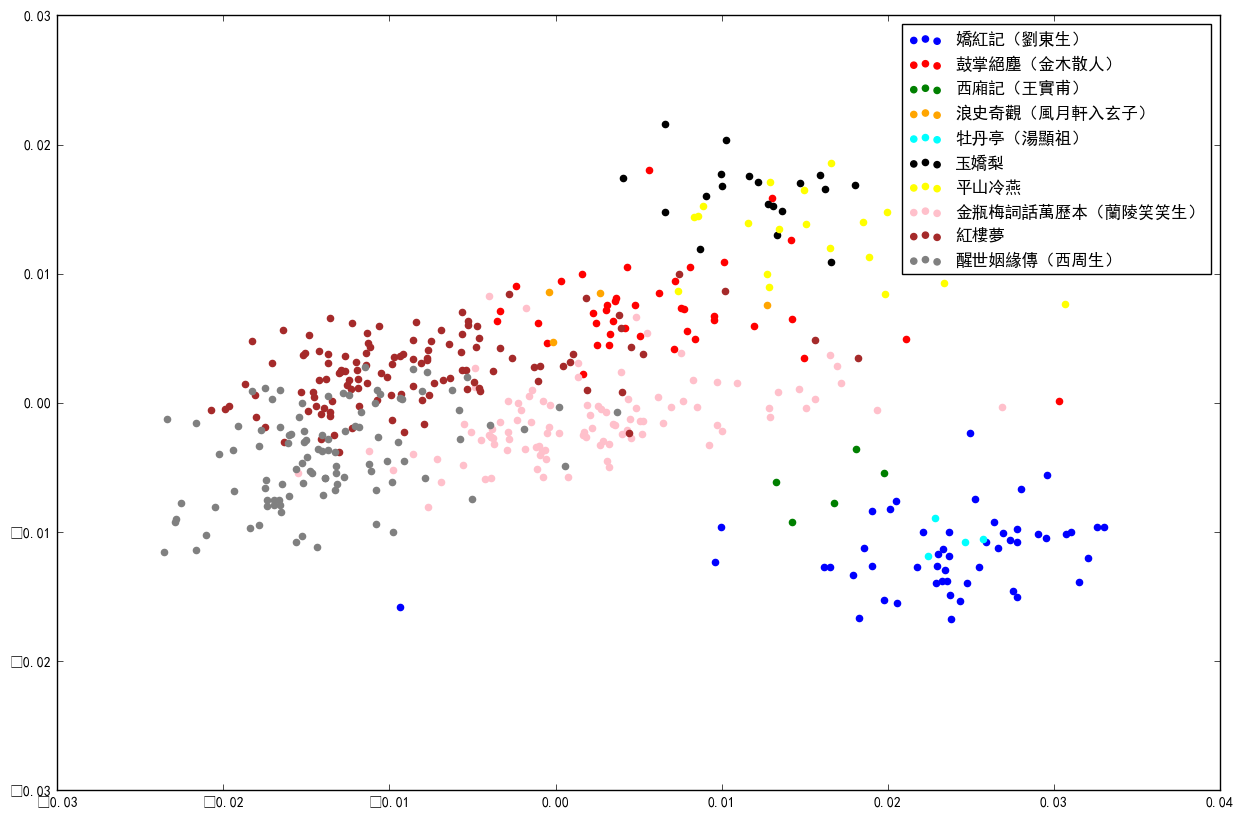

In [8]:
x = df_joined.ix[:,0:-1].values
y = df_joined.ix[:,-1].values

sklearn_pca = sklearnPCA.PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x)

headings = texts

plt.figure(figsize=(15,10))
mylegends = []
for textnum in range(0, len(headings)):
    name = headings[textnum]
    thislegend = plt.scatter(Y_sklearn[y==name,0], Y_sklearn[y==name,1], color=mycolors[textnum], label=texttitle[textnum])
    mylegends.append(thislegend)

plt.legend(handles = mylegends)
plt.show()